# Decision Tree Regressor - Implementation in Diabetes Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings

In [6]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [7]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import tree 

In [8]:
# Loading data
X, y = load_diabetes(return_X_y=True,as_frame=True)

In [9]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [10]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

## Train Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Correlation Matrix

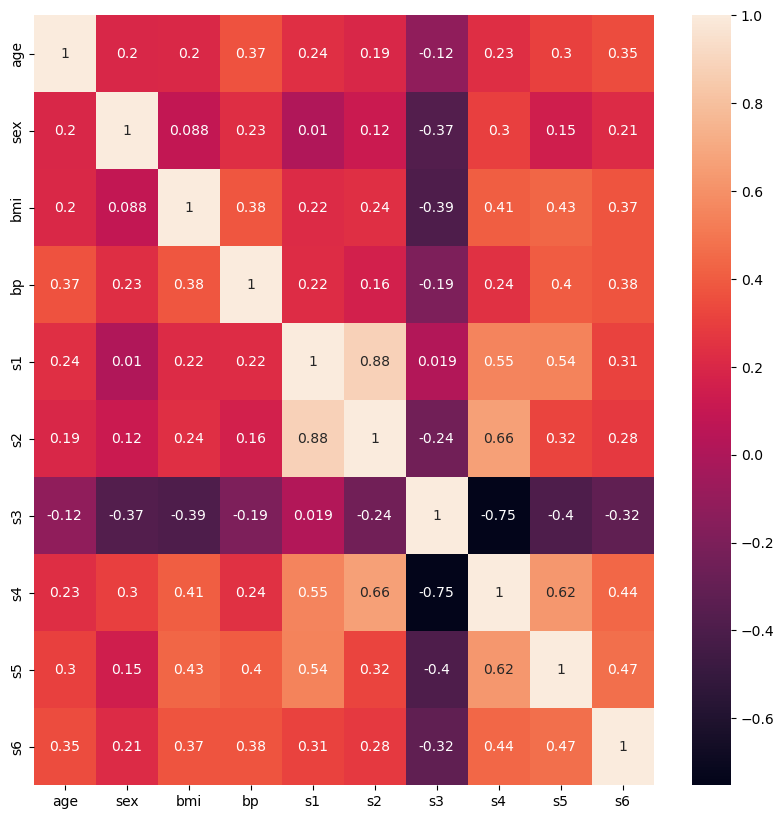

In [12]:
corr = X_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr, annot=True);

# Sample Model Training

In [13]:
sample_model = DecisionTreeRegressor()
# Fiting model to data
sample_model.fit(X_train, y_train)
# Getting Predictions
y_pred = sample_model.predict(X_test)

## Visualizing the Decision Tree

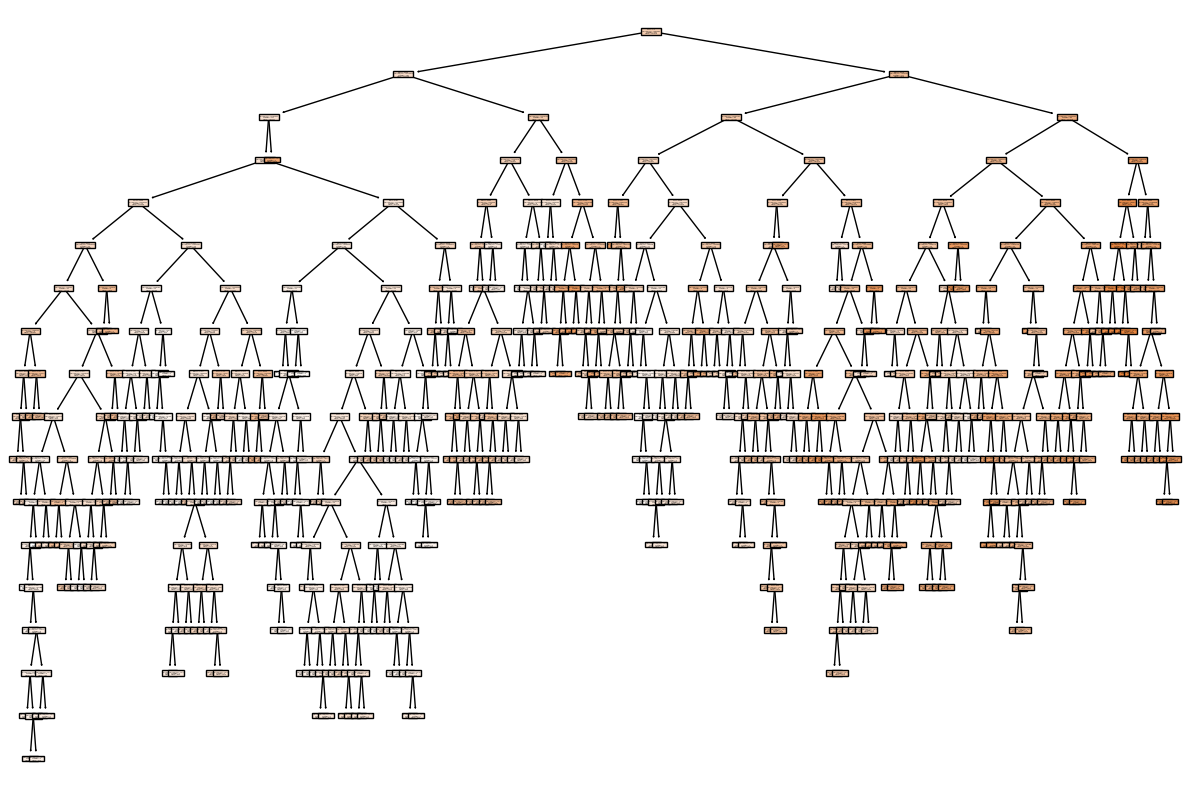

In [14]:
plt.figure(figsize=(15,10))
tree.plot_tree(sample_model, feature_names=X_train.columns.to_list(), filled=True);

## Sample Model Scores

In [15]:
print("R squared:", r2_score(y_test, y_pred), end="\n\n")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred), end="\n\n")
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

R squared: -0.09226115848555438

Mean Absolute Error: 61.82022471910113

Root Mean Squared Error: 82.63130511053097


# Hyperparameter Tuning

In [16]:
# Parameter Grid for Hyperparameter tuning
param_grid = {  'criterion' : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
                'splitter' : ["best", "random"],
                'max_depth' : [1, 2, 3, 4, 5],             # Pre-pruning
                'max_features' : ["auto", "sqrt", "log2"]}

In [17]:
# Initializing grid
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, n_jobs=-1, scoring='neg_root_mean_squared_error')

In [18]:
# Fitting the model
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_root_mean_squared_error')

In [19]:
# Best Parameters
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [20]:
# Best score
grid.best_score_

-60.9487642478879

In [21]:
# Best Model
model = grid.best_estimator_
model

DecisionTreeRegressor(criterion='poisson', max_depth=4, max_features='log2')

## Visualizing the Decision Tree

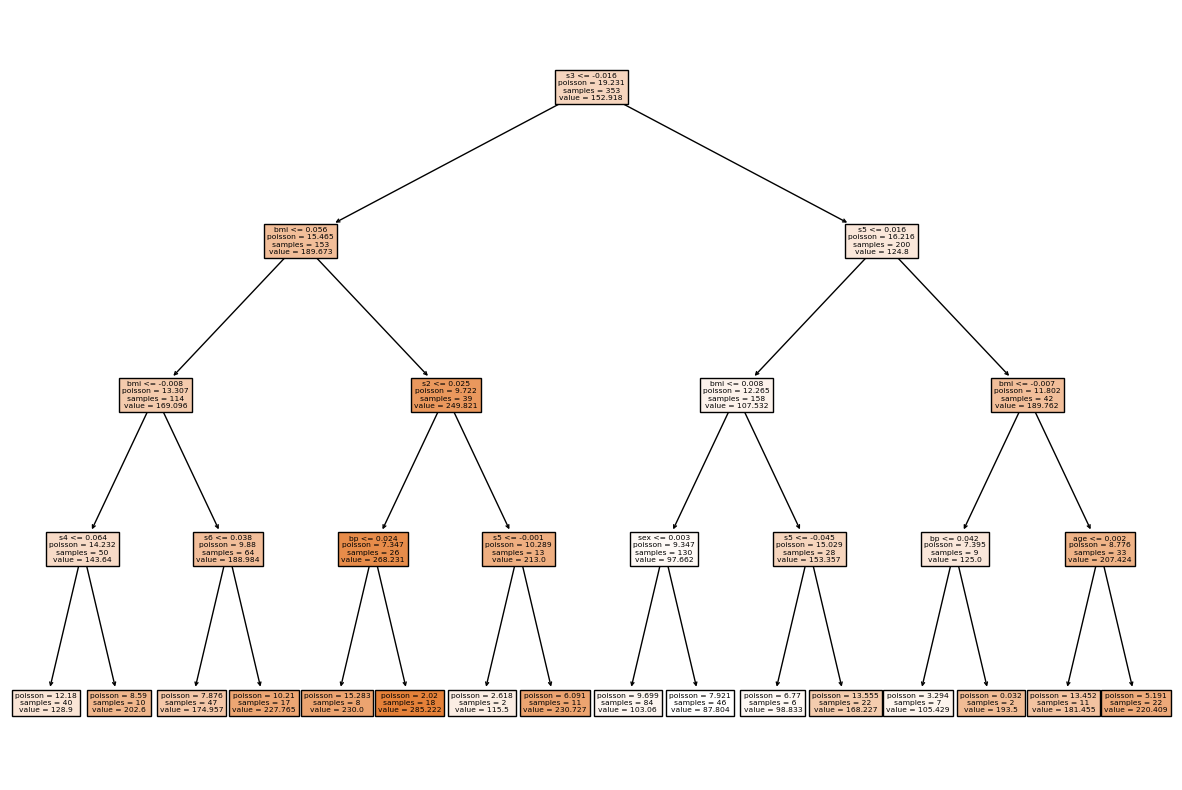

In [22]:
plt.figure(figsize=(15,10))
tree.plot_tree(model, feature_names=X_train.columns.to_list(), filled=True);

## Model Scores

In [23]:
y_pred = model.predict(X_test)
print("R squared:", r2_score(y_test, y_pred), end="\n\n")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred), end="\n\n")
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

R squared: 0.3592634467359217

Mean Absolute Error: 50.90057828405045

Root Mean Squared Error: 63.28796298484609


# Model Pickling

In [24]:
with open('Models/decision_tree_regressor.pkl', 'wb') as file:
    pickle.dump(model, file)